In [1]:
import matplotlib.pyplot as plt

In [3]:
boofer_size = 200000
max_fade_time = 10000
boofer = [[0.] for _ in range(boofer_size)]
indices_to_update = [[] for _ in range(max_fade_time)]
global_clock = 0
global_clock_max = 300000


def erase(index, clock_time, value, samples=max_fade_time):
    # ADD UPDATE TO BOOFER, THEN SAY WHAT CLOCK TIME TO MAKE THE UPDATE
    boofer[index].append([0, clock_time + samples, value, samples])
    if index not in indices_to_update[clock_time % max_fade_time]:
        indices_to_update[clock_time % max_fade_time].append(index)

def write(index, clock_time, value, samples=max_fade_time):
    # ADD UPDATE TO BOOFER, THEN SAY WHAT CLOCK TIME TO MAKE THE UPDATE
    boofer[index].append([1, clock_time + samples, value, value/samples])
    if index not in indices_to_update[clock_time % max_fade_time]:
        indices_to_update[clock_time % max_fade_time].append(index)

def pre_housekeeping(clock_time):
    # WE KNOW WHAT INDICES IN BOOFER TO UPDATE FOR ANY GIVEN CLOCK SO WE DO THAT
    for index in indices_to_update[clock_time % max_fade_time]:
        update(index, clock_time)
    indices_to_update[clock_time % max_fade_time].clear()


def update(index, clock_time):

    global global_clock_max


    ## WE ARE RESOLVING ALL RIPE UPDATES INTO MAIN BOOFER VAL
    content = boofer[index]
    ripe_updates = []

    for i in range(1, len(content)):
        update = content[i]
        if not update[0]: ##THIS MEANS ITS AN ERASE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            if time_til_ripe <= 0:
                ripe_updates.append(i)
                content[0] *= update[2]

    ## ERASE BEFORE WRITE JUST FOR CONSISTENT BEHAVIOR
                
    for i in range(1, len(content)):
        update = content[i]
        if update[0]: ##THIS MEANS ITS A WRITE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            if time_til_ripe <= 0:
                ripe_updates.append(i)
                content[0] += update[2]

    boofer[index] = [content[i] for i in range(len(content)) if i not in ripe_updates]

    # boofer[index] = [_[i] for i in range(len(content)) if i not in ripe_updates]



def read(index, clock_time):

    global global_clock_max
    ## DYNAMICALLY READ FADING IN ERASES AND WRITES
    content = boofer[index]
    value = content[0] ## THIS IS NOT IN PLACE

    for i in range(1, len(content)):
        update = content[i]
        if not update[0]: ## ERASE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            frac_offset = (update[3] * update[2])/(1-update[2])
            factor = (frac_offset) / ((update[3] - time_til_ripe) + frac_offset + 1)
            value *= factor
            

    ## ERASE BEFORE WRITE JUST FOR CONSISTENT BEHAVIOR
    
    for i in range(1, len(content)):
        update = content[i]
        if update[0]: ## WRITE
            time_til_ripe = (update[1] - clock_time) % global_clock_max
            target_val = update[2]
            fading_in_val = target_val - (time_til_ripe * update[3])
            value += fading_in_val
    return value



def full_cycle(heads):
    global global_clock_max
    global global_clock

    pre_housekeeping(global_clock)

    wet_signal = 0

    for head in heads:
        if head[0] == -1: 
            wet_signal += read(head[1], global_clock)
        if head[0] == 0: 
            erase(head[1], global_clock, head[2])
        if head[0] == 1: 
            write(head[1], global_clock, head[2])

    global_clock = (global_clock + 1) % global_clock_max



    
    





        
        
        
        
    
    



    
    

    
    

        
            
        
            
            
            
    
    
    






In [5]:
from tqdm import tqdm

0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3348291.25it/s]

READY TO RIP


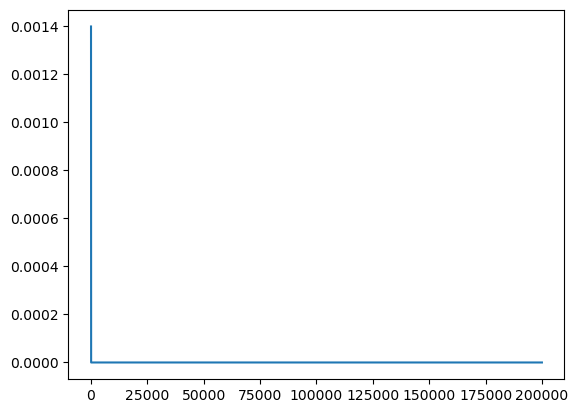

2000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 911179.28it/s]

READY TO RIP


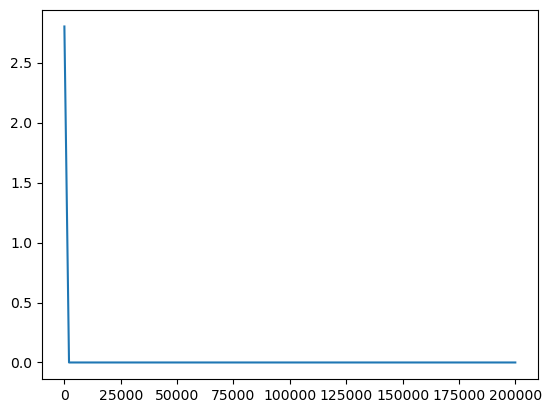

4000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3565826.99it/s]

READY TO RIP


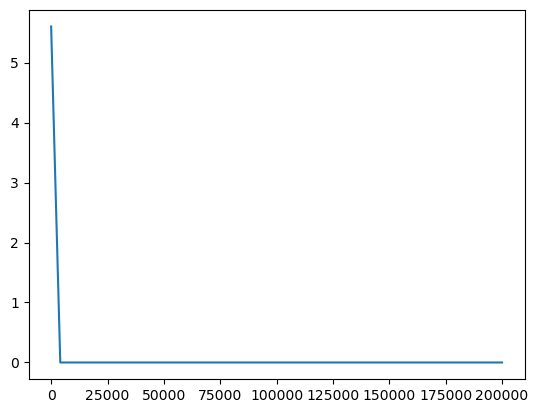

6000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3517354.04it/s]


READY TO RIP


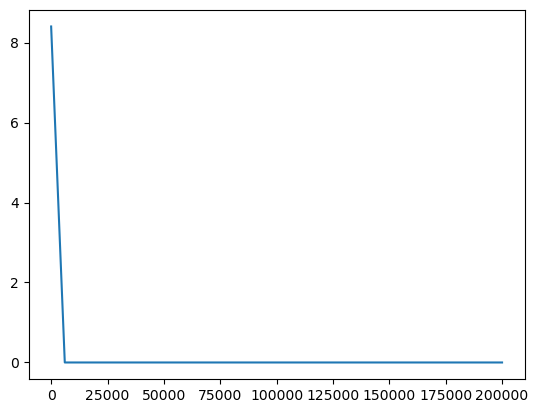

8000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3535394.80it/s]


READY TO RIP


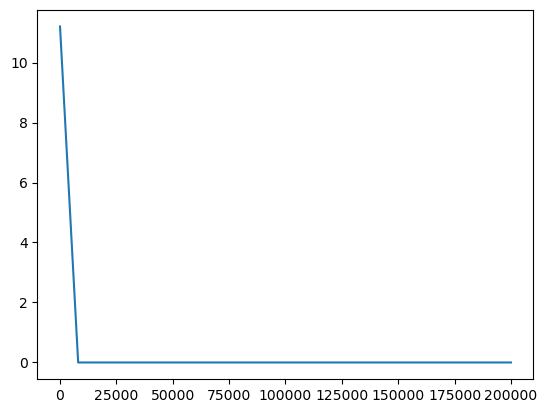

10000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3602642.09it/s]


READY TO RIP


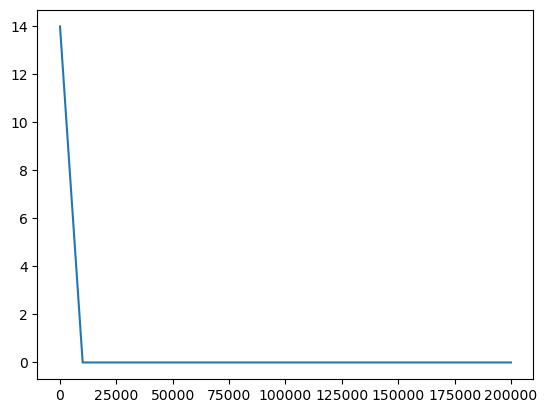

12000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3632265.41it/s]


READY TO RIP


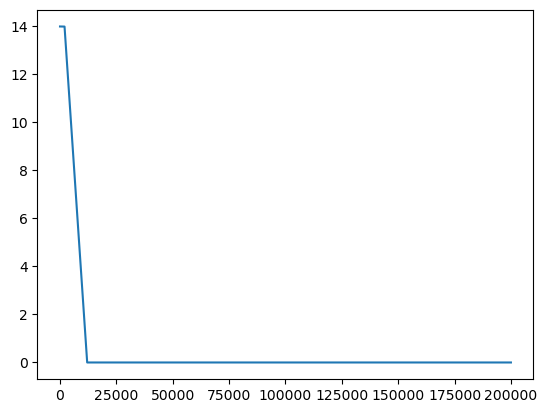

14000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3590460.37it/s]


READY TO RIP


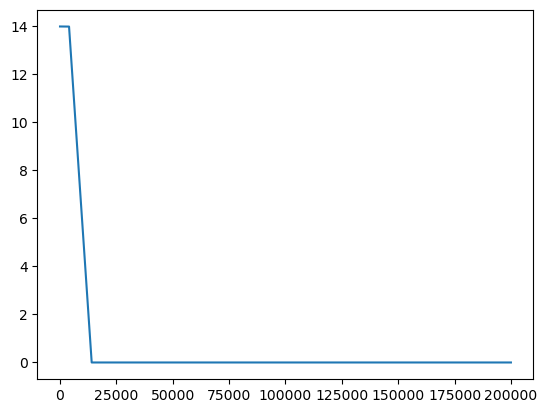

16000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3569195.16it/s]

READY TO RIP


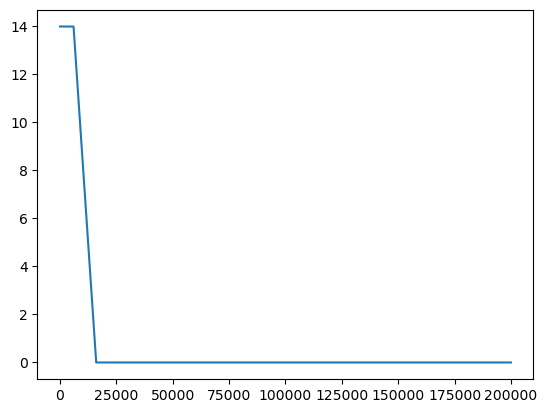

18000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3593813.67it/s]

READY TO RIP


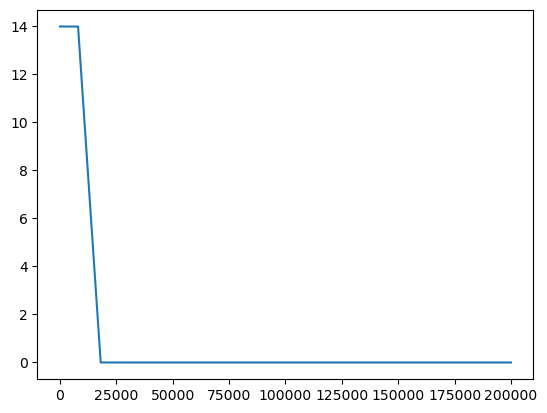

20000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3465235.73it/s]


READY TO RIP


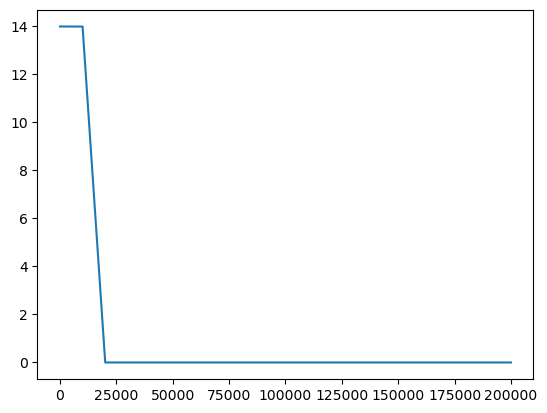

22000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3334939.99it/s]

READY TO RIP


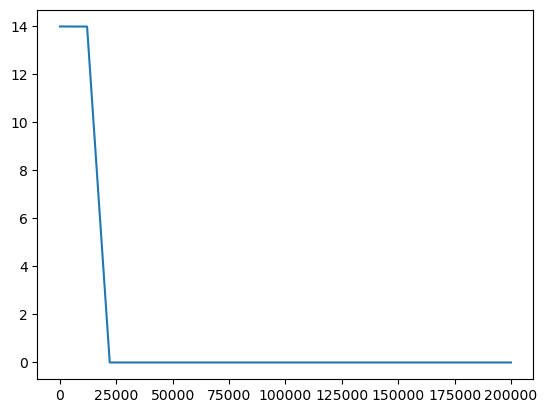

24000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3333005.41it/s]

READY TO RIP


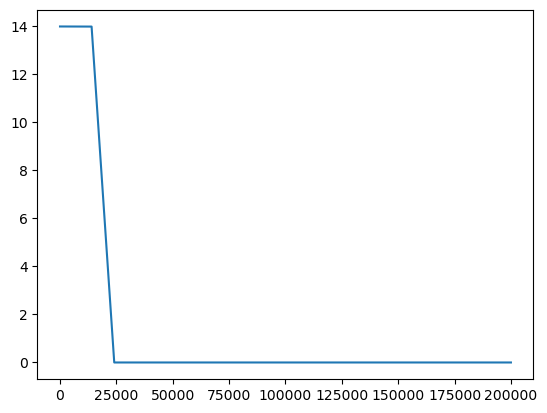

26000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3495224.21it/s]

READY TO RIP


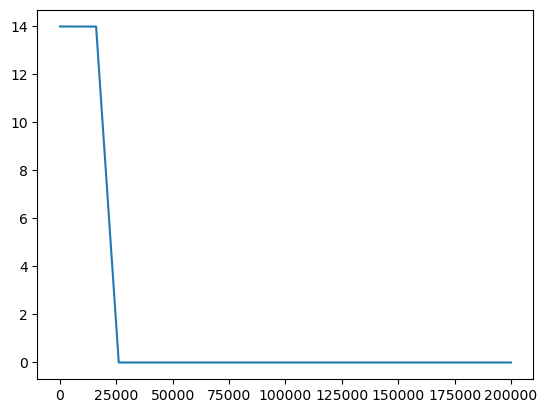

28000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3212844.32it/s]

READY TO RIP


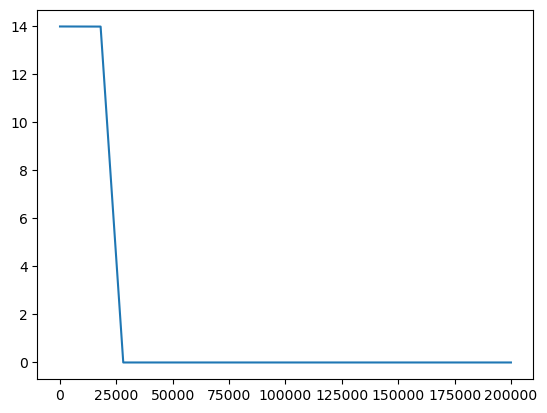

30000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3405296.74it/s]

READY TO RIP


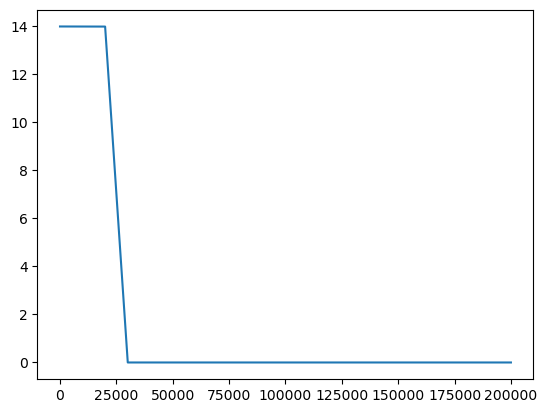

32000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3322484.16it/s]

READY TO RIP


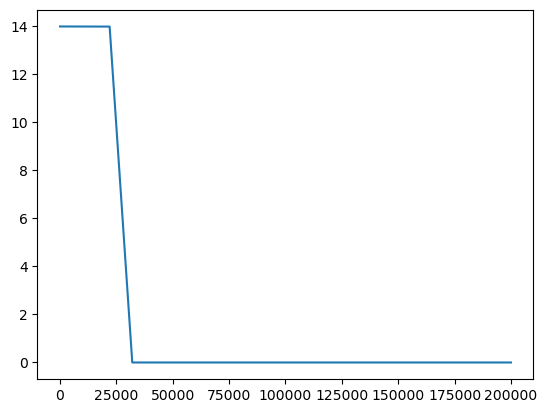

34000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3407676.06it/s]

READY TO RIP


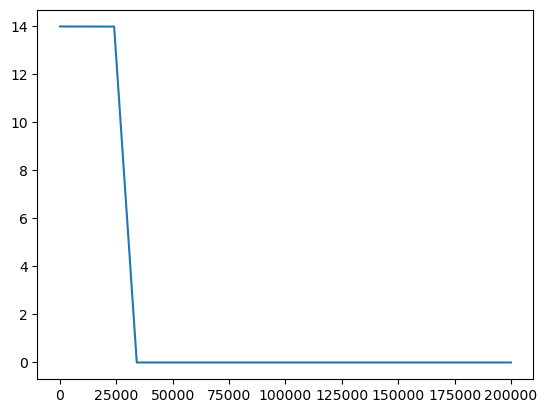

36000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3435419.77it/s]

READY TO RIP


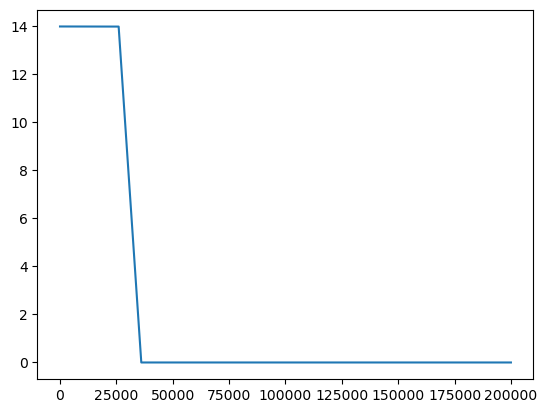

38000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3459676.33it/s]

READY TO RIP


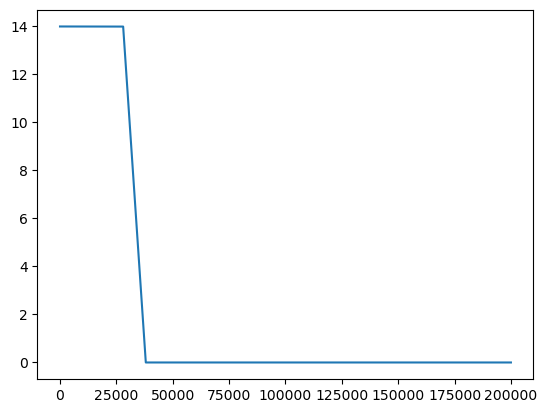

40000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3489611.79it/s]

READY TO RIP


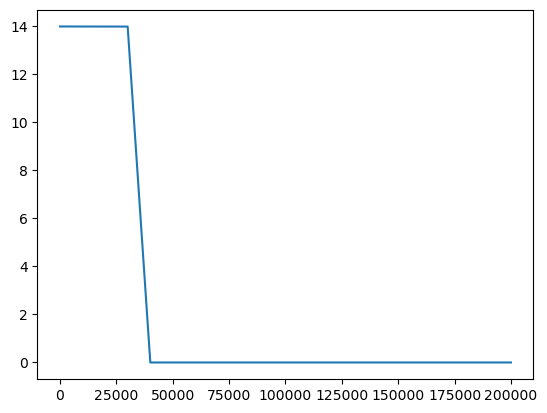

42000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3218181.33it/s]

READY TO RIP


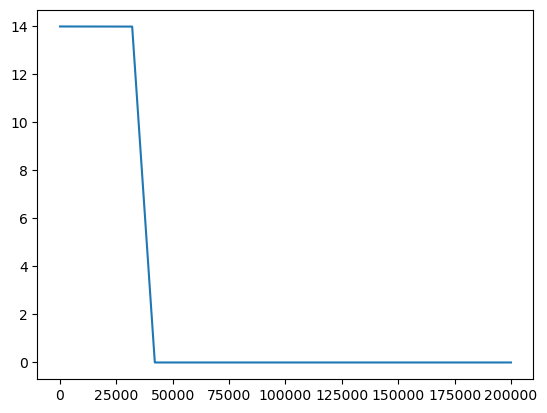

44000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3391158.89it/s]

READY TO RIP


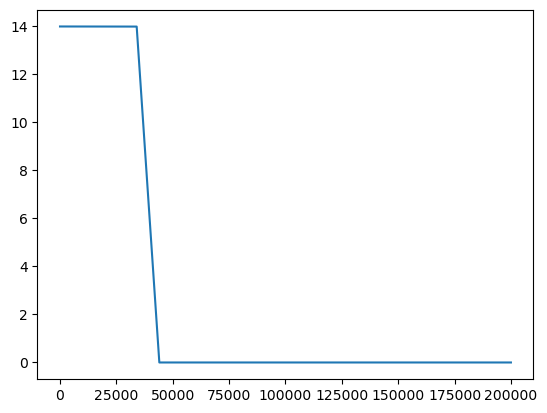

46000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3336664.45it/s]

READY TO RIP


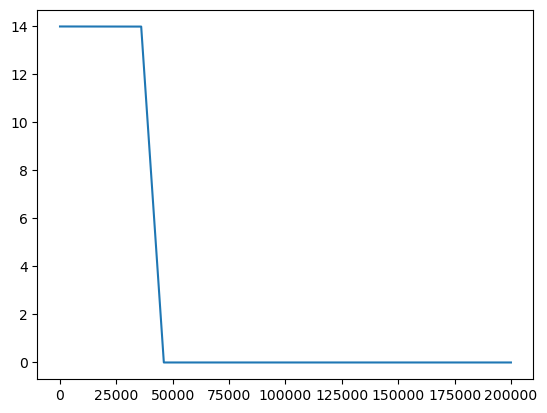

48000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3442878.54it/s]

READY TO RIP


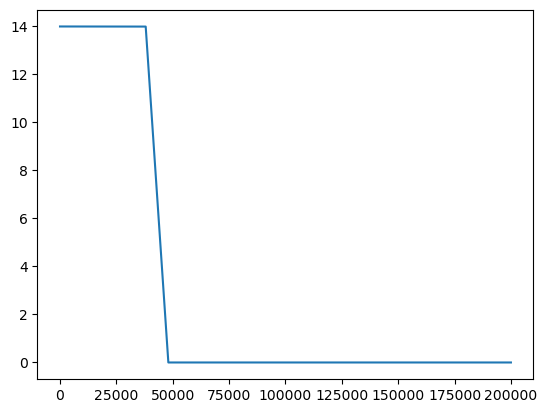

50000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3439264.97it/s]

READY TO RIP


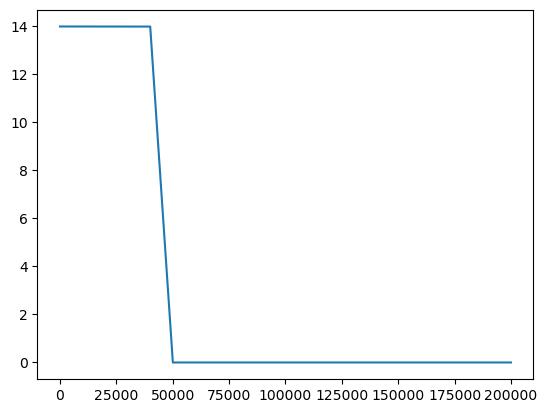

52000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3409823.06it/s]

READY TO RIP


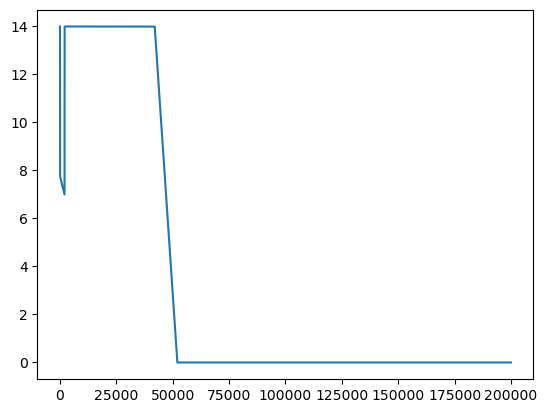

54000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3415654.35it/s]

READY TO RIP


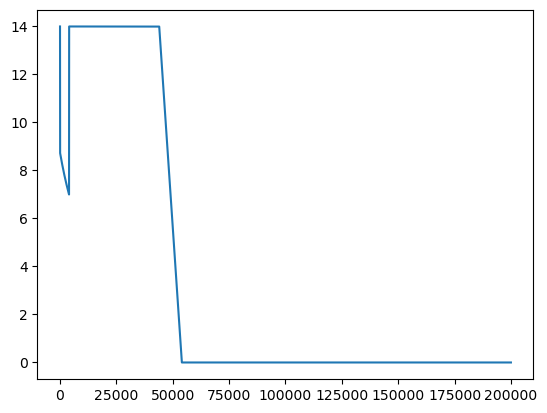

56000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3292284.02it/s]

READY TO RIP


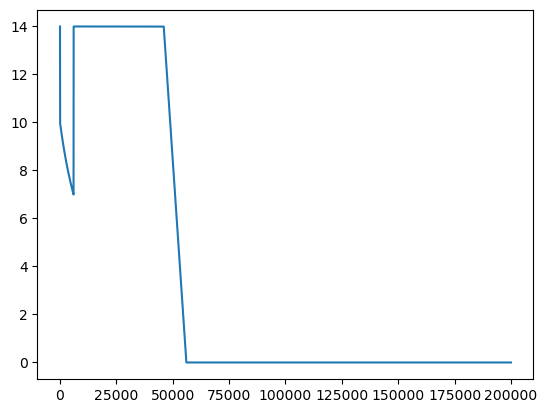

58000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3259395.34it/s]

READY TO RIP


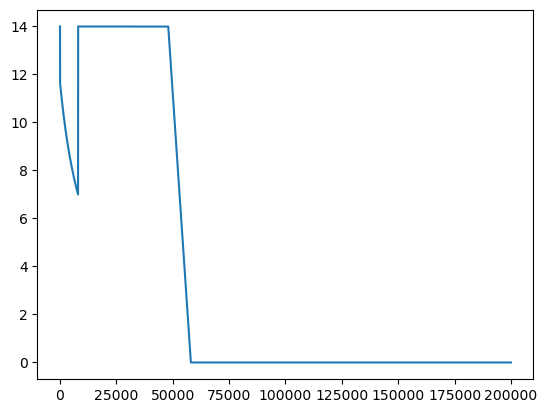

60000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3210741.50it/s]

READY TO RIP


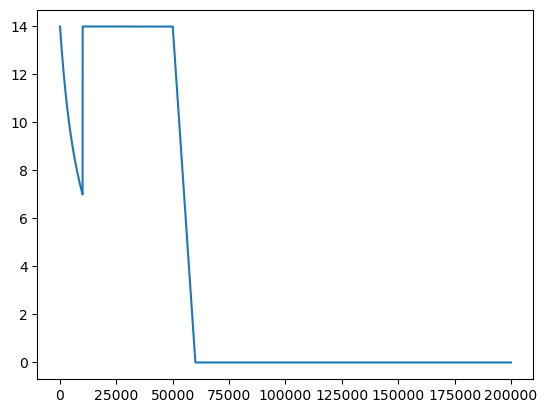

62000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3294572.68it/s]

READY TO RIP


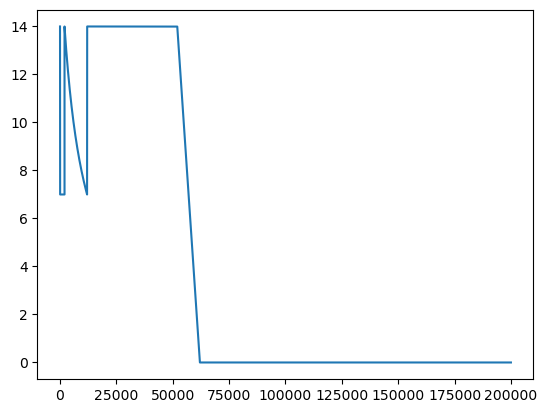

64000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3148616.86it/s]

READY TO RIP


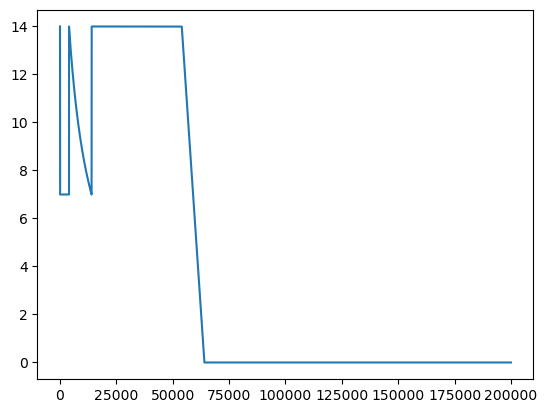

66000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3215319.57it/s]

READY TO RIP


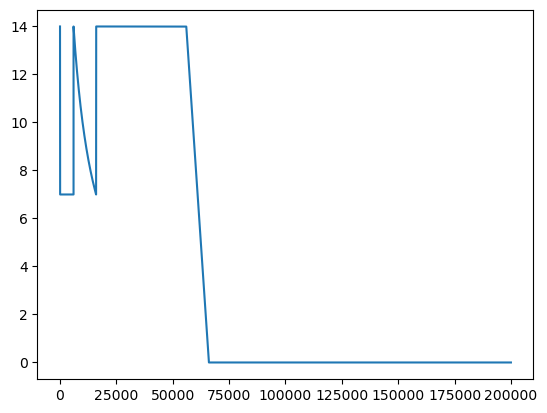

68000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3274229.22it/s]

READY TO RIP


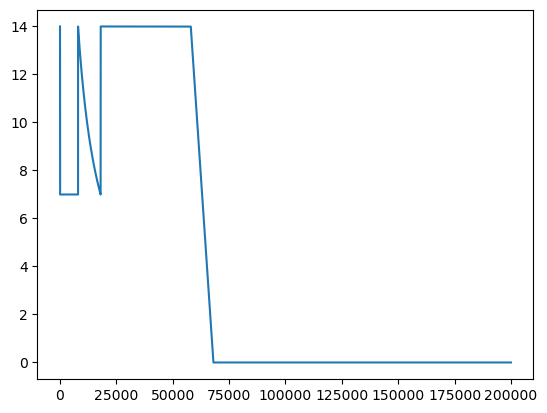

70000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3285630.13it/s]


READY TO RIP


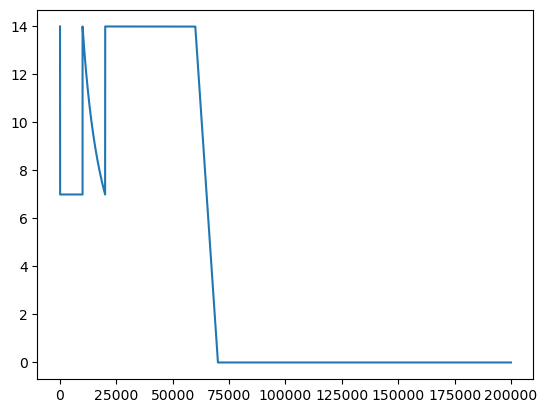

72000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3297175.51it/s]

READY TO RIP


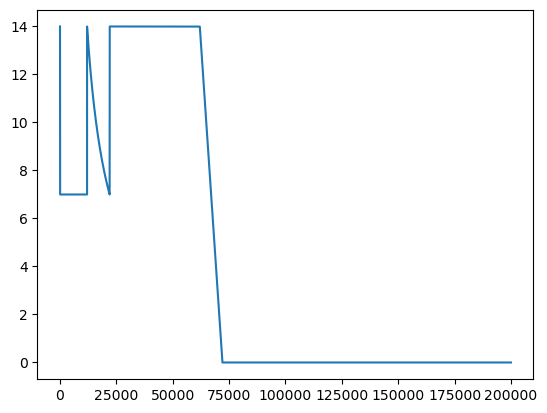

74000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3307432.51it/s]

READY TO RIP


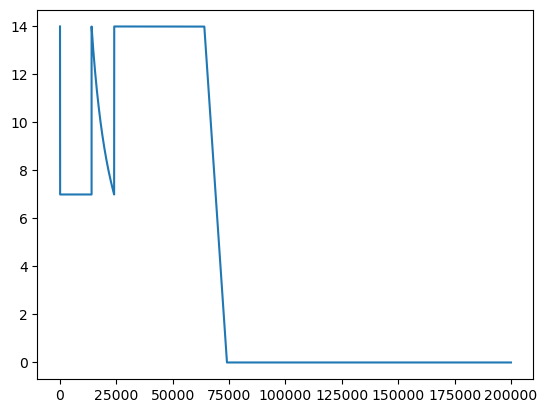

76000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3176263.81it/s]

READY TO RIP


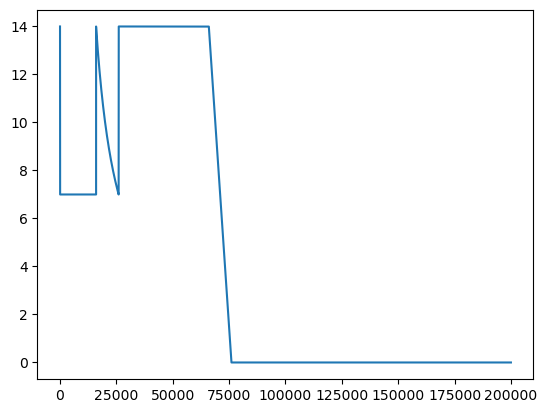

78000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3213521.25it/s]

READY TO RIP


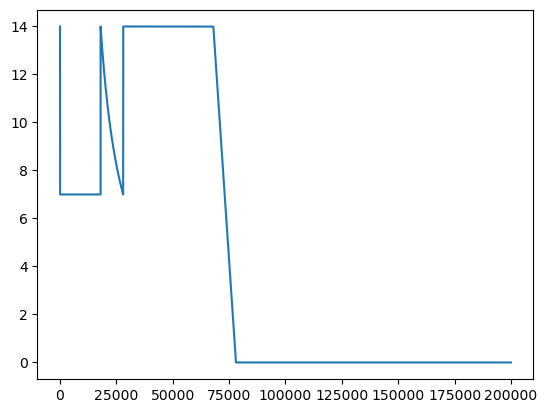

80000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3213632.05it/s]

READY TO RIP


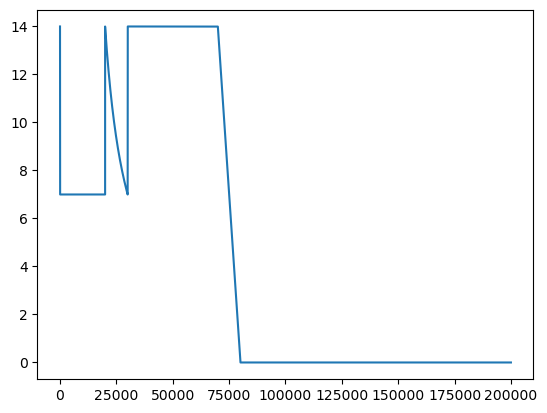

82000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3272938.95it/s]

READY TO RIP


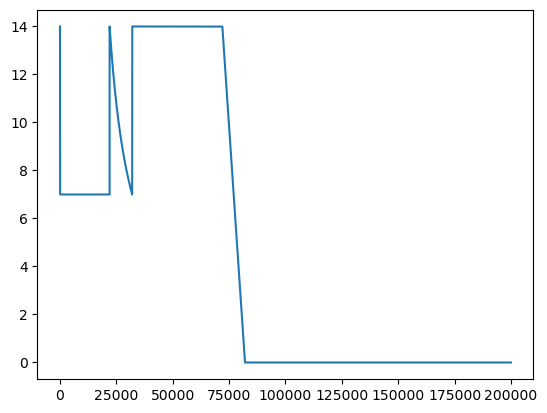

84000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3196878.05it/s]

READY TO RIP


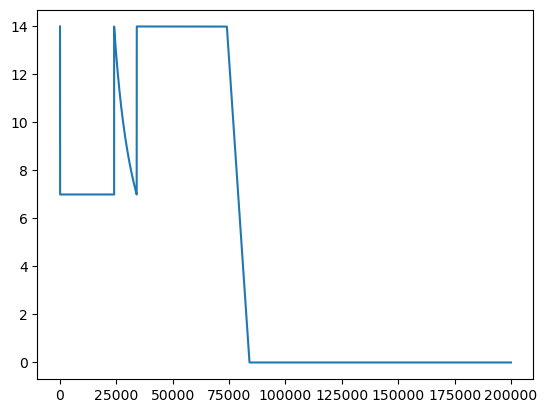

86000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3304019.44it/s]

READY TO RIP


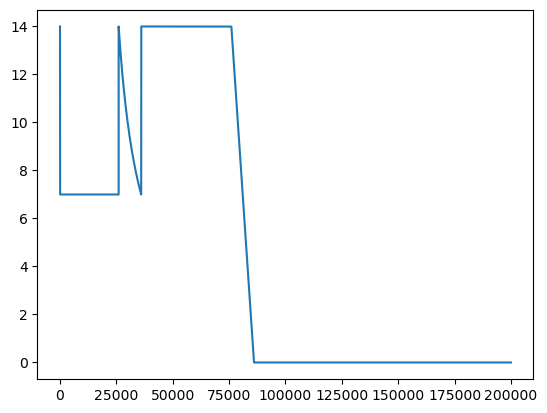

88000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3239657.83it/s]

READY TO RIP


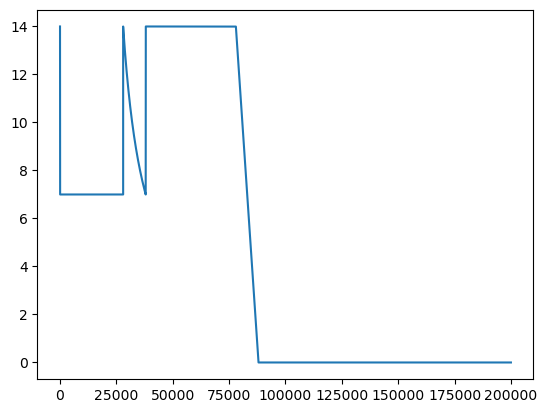

90000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3247911.35it/s]

READY TO RIP


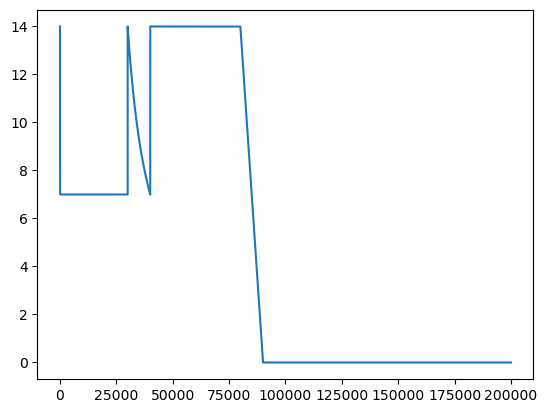

92000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3292568.32it/s]

READY TO RIP


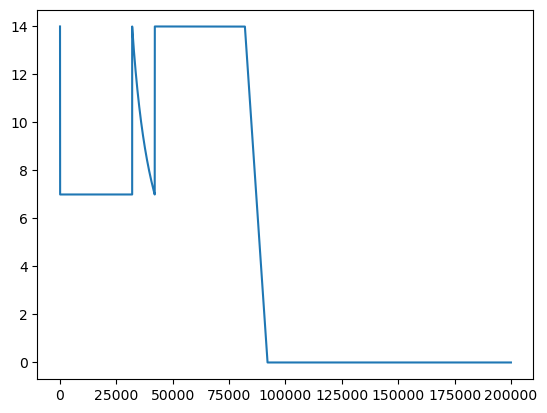

94000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3259509.32it/s]

READY TO RIP


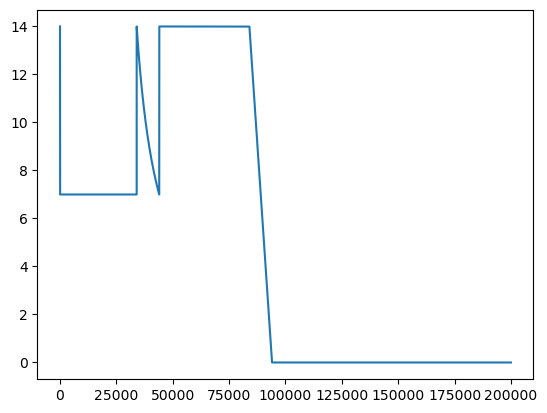

96000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3342474.40it/s]

READY TO RIP


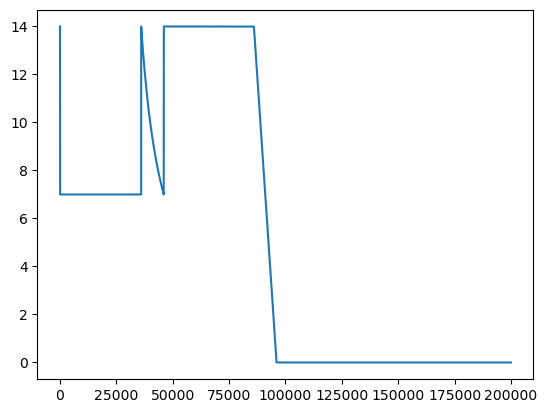

98000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:00<00:00, 3319552.20it/s]

READY TO RIP


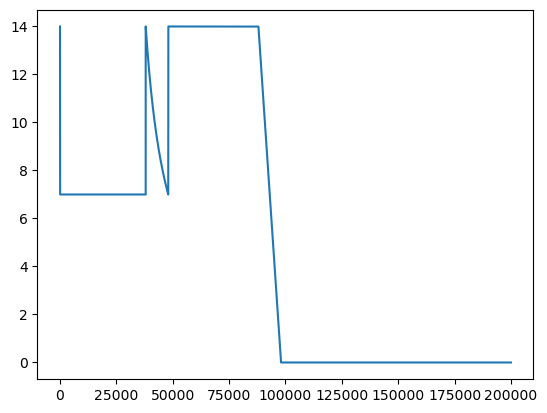

In [7]:
for i in (range(100000)):
    heads = [[1, i, 14.]]
    if i > 50000:
        heads.append([0, i-50000, .5])
    full_cycle(heads)
    if i % 2000 == 0:
        print(i)
        read_buff = []
        for i in tqdm(range(boofer_size)):
            result = read(i, global_clock)
            if isinstance(result, str):
                print(i, result)
            read_buff.append(result)
        print("READY TO RIP")
        plt.plot(read_buff)
        plt.show()

In [9]:
print(_)

{"dataframes": [], "user": "chris_h_3"}
